In [67]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
%matplotlib inline

In [30]:
airbnb = pd.read_csv("filtered_nyc_airbnb_2019.csv")
airbnb = airbnb.dropna()
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [41]:
airbnb_dummies = pd.get_dummies(airbnb, columns = ["neighbourhood_group", "room_type"])
airbnb_dummies.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,...,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,...,6,365,0,1,0,0,0,0,1,0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,...,2,355,0,0,1,0,0,1,0,0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,...,1,194,0,1,0,0,0,1,0,0
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,...,1,0,0,0,1,0,0,1,0,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,...,1,129,0,0,1,0,0,1,0,0


In [42]:
airbnb_dummies.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [43]:
lm = smf.ols("price ~ latitude + longitude + minimum_nights + number_of_reviews + reviews_per_month + calculated_host_listings_count + availability_365 + neighbourhood_group_Bronx + neighbourhood_group_Brooklyn + neighbourhood_group_Manhattan + neighbourhood_group_Queens + Q('neighbourhood_group_Staten Island') + Q('room_type_Entire home/apt') + Q('room_type_Private room') + Q('room_type_Shared room')", data = airbnb_dummies).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     2472.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:19:28   Log-Likelihood:            -2.0658e+05
No. Observations:               37589   AIC:                         4.132e+05
Df Residuals:                   37575   BIC:                         4.133e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -1.419e+04    609.888    -23.262      0.000   -1.54e+04    -1.3e+04
latitude                                -100.5469      9.208    -10.920      0.000    -118.594     -82.500
longitude                               -350.5464     10.499    -33.388      0.000    -371.125    -329.968
minimum_nights                            -1.2510      0.044    -28.376      0.000      -1.337      -1.165
number_of_reviews                         -0.0913      0.008    -11.979      0.000      -0.106      -0.076
reviews_per_month                          0.4810      0.224      2.151      0.031       0.043       0.919
calculated_host_listings_count             0.1158      0.012      9.565      0.000       0.092       0.140
availability_365                           0.0884      0.003     34.170      0.000       0.083       0.093
neighbourhood_group_Bronx              -2823.2777    121.955    -23.150      0.000   -3062.314   -2584.242
neighbourhood_group_Brooklyn           -2832.6238    121.665    -23.282      0.000   -3071.090   -2594.158
neighbourhood_group_Manhattan          -2791.2566    122.322    -22.819      0.000   -3031.012   -2551.501
neighbourhood_group_Queens             -2815.6606    121.180    -23.235      0.000   -3053.176   -2578.145
Q('neighbourhood_group_Staten Island') -2924.2928    122.835    -23.807      0.000   -3165.053   -2683.532
Q('room_type_Entire home/apt')         -4662.2774    203.312    -22.932      0.000   -5060.775   -4263.780
Q('room_type_Private room')            -4746.5958    203.286    -23.349      0.000   -5145.042   -4348.149
Q('room_type_Shared room')             -4778.2383    203.297    -23.504      0.000   -5176.705   -4379.772
==============================================================================
Omnibus:                    13070.303   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56060.291
Skew:                           1.673   Prob(JB):                         0.00
Kurtosis:                       7.959   Cond. No.                     1.77e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

__This model explains 46.1% (Rsq.) of the variation in listing price.__

In [80]:
lm2 = smf.ols("price ~ neighbourhood + latitude + longitude + minimum_nights + number_of_reviews + reviews_per_month + calculated_host_listings_count + availability_365 + neighbourhood_group_Bronx + neighbourhood_group_Brooklyn + neighbourhood_group_Manhattan + neighbourhood_group_Queens + Q('neighbourhood_group_Staten Island') + Q('room_type_Entire home/apt') + Q('room_type_Private room') + Q('room_type_Shared room')", data = airbnb_dummies).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     172.6
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:23:34   Log-Likelihood:            -2.0475e+05
No. Observations:               37589   AIC:                         4.100e+05
Df Residuals:                   37362   BIC:                         4.119e+05
Df Model:                         226                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                   -2.245e+04   2422.213     -9.269      0.000   -2.72e+04   -1.77e+04
neighbourhood[T.Arden Heights]               -165.7490     30.756     -5.389      0.000    -226.032    -105.466
neighbourhood[T.Arrochar]                     -92.5252     17.104     -5.409      0.000    -126.050     -59.000
neighbourhood[T.Arverne]                      -57.0896      9.740     -5.861      0.000     -76.181     -37.999
neighbourhood[T.Astoria]                     -128.6293     14.905     -8.630      0.000    -157.843     -99.416
neighbourhood[T.Bath Beach]                  -143.8811     17.672     -8.142      0.000    -178.519    -109.244
neighbourhood[T.Battery Park City]           -146.0392     17.819     -8.196      0.000    -180.964    -111.114
neighbourhood[T.Bay Ridge]                   -135.8276     12.872    -10.552      0.000    -161.057    -110.598
neighbourhood[T.Bay Terrace]                  -39.7517     27.335     -1.454      0.146     -93.330      13.827
neighbourhood[T.Bay Terrace, Staten Island]  -112.7763     40.772     -2.766      0.006    -192.691     -32.861
neighbourhood[T.Baychester]                    -1.5425     24.903     -0.062      0.951     -50.352      47.267
neighbourhood[T.Bayside]                      -59.0228     14.527     -4.063      0.000     -87.496     -30.549
neighbourhood[T.Bayswater]                    -64.4248     17.539     -3.673      0.000     -98.801     -30.049
neighbourhood[T.Bedford-Stuyvesant]           -89.3193     10.740     -8.316      0.000    -110.371     -68.268
neighbourhood[T.Belle Harbor]                 -45.7881     26.232     -1.746      0.081     -97.203       5.627
neighbourhood[T.Bellerose]                    -36.8446     21.197     -1.738      0.082     -78.391       4.702
neighbourhood[T.Belmont]                      -10.4260     16.384     -0.636      0.525     -42.540      21.688
neighbourhood[T.Bensonhurst]                 -134.8439     12.347    -10.922      0.000    -159.044    -110.644
neighbourhood[T.Bergen Beach]                -106.3428     20.897     -5.089      0.000    -147.301     -65.385
neighbourhood[T.Boerum Hill]                  -75.9051     12.872     -5.897      0.000    -101.134     -50.676
neighbourhood[T.Borough Park]                -134.6264     12.063    -11.161      0.000    -158.270    -110.983
neighbourhood[T.Breezy Point]                  20.3275     40.229      0.505      0.613     -58.522      99.177
neighbourhood[T.Briarwood]                   -100.7359     12.805     -7.867      0.000    -125.833     -75.638
neighbourhood[T.Brighton Beach]              -113.2959     10.985    -10.313      0.000    -134.827     -91.764
neighbourhood[T.Bronxdale]                    -22.1931     

__After specific neighborhoods are accounted for, the model explains 51.10% (Rsq.) of the variation in listing price.__
__However, significant overfitting is probably occuring here and the model is rather complex...__


__Sticking with the first model...__

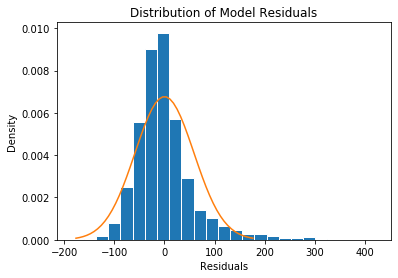

In [59]:
x = np.linspace(lm.resid.mean() - 3 * lm.resid.std(), lm.resid.mean() + 3 * lm.resid.std())
y = stats.norm.pdf(x, lm.resid.mean(), lm.resid.std())
lm.resid.hist(density = True, bins = 25, edgecolor = "w", grid = False)
plt.plot(x,y)
plt.title("Distribution of Model Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.savefig("plots/lm_residuals_dist.png")

__The residuals appear to be roughly normally dsitributed.__

In [61]:
airbnb_dummies.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,...,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,...,6,365,0,1,0,0,0,0,1,0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,...,2,355,0,0,1,0,0,1,0,0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,...,1,194,0,1,0,0,0,1,0,0
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,...,1,0,0,0,1,0,0,1,0,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,...,1,129,0,0,1,0,0,1,0,0


In [70]:
airbnb_dummies2 = airbnb_dummies.drop(["Unnamed: 0", "id", "name", "host_id", "host_name", "neighbourhood","last_review"], axis = 1)

In [83]:
airbnb_dummies2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
5,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(airbnb_dummies2, airbnb_dummies2["price"], test_size = 0.2)

In [74]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [79]:
predictions = model.predict(X_test)

mse = ((y_test - predictions)**2).mean()
mse

1.8559181909351343e-27

__Extremely low MSE following cross validation... Overfitting is present. Removing some features__

In [82]:
lm3 = smf.ols("price ~ latitude + longitude + neighbourhood_group + room_type", data = airbnb).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3605.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:25:27   Log-Likelihood:            -2.0749e+05
No. Observations:               37589   AIC:                         4.150e+05
Df Residuals:                   37580   BIC:                         4.151e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -1.708e+04    945.652    -18.057      0.000   -1.89e+04   -1.52e+04
neighbourhood_group[T.Brooklyn]        -21.2397      2.627     -8.086      0.000     -26.388     -16.091
neighbourhood_group[T.Manhattan]        24.4864      2.389     10.248      0.000      19.803      29.169
neighbourhood_group[T.Queens]           -0.4553      2.534     -0.180      0.857      -5.422       4.511
neighbourhood_group[T.Staten Island]  -100.2551      4.913    -20.407      0.000    -109.884     -90.626
room_type[T.Private room]              -82.0722      0.646   -127.067      0.000     -83.338     -80.806
room_type[T.Shared room]              -108.7786      2.140    -50.824      0.000    -112.974    -104.583
latitude                              -145.2924      9.342    -15.553      0.000    -163.602    -126.982
longitude                             -313.1610     10.631    -29.458      0.000    -333.997    -292.325
==============================================================================
Omnibus:                    13259.763   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57086.054
Skew:                           1.699   Prob(JB):                         0.00
Kurtosis:                       7.990   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__This new model explains 43.4% of the variation in listing price.__

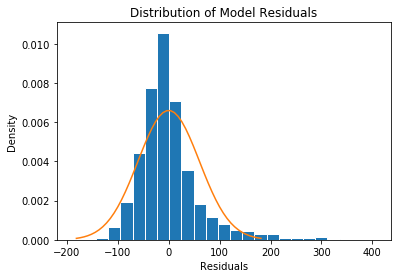

In [84]:
x = np.linspace(lm3.resid.mean() - 3 * lm3.resid.std(), lm3.resid.mean() + 3 * lm3.resid.std())
y = stats.norm.pdf(x, lm3.resid.mean(), lm3.resid.std())
lm3.resid.hist(density = True, bins = 25, edgecolor = "w", grid = False)
plt.plot(x,y)
plt.title("Distribution of Model Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.savefig("plots/lm3_residuals_dist.png")

__The residuals still appear to be roughly normally dsitributed.__

In [87]:
airbnb_dummies2.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [90]:
airbnb_dummies3 = airbnb_dummies2.drop(['price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], axis = 1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(airbnb_dummies3, airbnb_dummies2["price"], test_size = 0.2)

In [92]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = ((y_test - predictions)**2).mean()
mse

3674.058575922049

In [95]:
import math

rmse = math.sqrt(mse)
rmse

60.614013032648224

In [113]:
print("Price Mean: " + str(airbnb2["price"].mean()))
print("Price Standard Deviation: " + str(airbnb2["price"].std()))
print("95% Mean Confidence Interval: " + str(airbnb2["price"].mean() - 1.96 * airbnb2["price"].std()) + " - " + str(airbnb2["price"].mean() + 1.96 * airbnb2["price"].std()))


Price Mean: 125.6976775120381
Price Standard Deviation: 80.2937461853187
95% Mean Confidence Interval: -31.678065011186533 - 283.07342003526276


__After cross validation, the model has a relatively high RMSE of \\$60.61 which is troubling considering the average listing price is \\$125 and the standard deviation of the listing price is \\$80.29.__

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
best_svr = SVR(kernel='rbf')
cross_val_score(best_svr, airbnb_dummies3, airbnb_dummies2["price"], cv=10)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

array([0.2977204 , 0.34222497, 0.41253628, 0.42003156, 0.39862661,
       0.4200646 , 0.41277112, 0.41186507, 0.40342436, 0.34365234])

In [112]:
array = np.array([0.2977204 , 0.34222497, 0.41253628, 0.42003156, 0.39862661,
       0.4200646 , 0.41277112, 0.41186507, 0.40342436, 0.34365234])
array.mean()

0.386291731

__Following k-fold validation, the average Rsq value is only 0.386.__